<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#42f5ec;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:black;text-align:center;">ARABIC FAKE NEWS CLASSIFICATION USING LSTM, BI-LSTM AND BERT</p></div>

<div style="background-color:#42f5ec; padding:20px; border-radius:10px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
<p style="font-family:Arial, sans-serif; font-size:24px; color:#000000; text-align:center;">🎯 Project Goal</p>

<p style="font-family:Arial, sans-serif; font-size:16px; line-height:1.5; color:#000000;">The task at hand is to train a model that can accurately differentiate between fake and real news in Arabic news article data. We'll create three models, LSTM, Bi-LSTM and BERT to handle the classification after which we'll compare their performance.💪🏽</p>

<p style="font-family:Arial, sans-serif; font-size:24px; color:#000000; text-align:center;">🥖 Dataset</p>    
<p style="font-family:Arial, sans-serif; font-size:16px; line-height:1.5; color:#000000;">Our dataset is comprised of news content that we scraped from popular Arabic news websites like <ul><li>Misbar (https://misbar.com/)</li><li>No Rumors (http://norumors.net/)</li><li>Verify-Sy (https://verify-sy.com/)</li><li>Fatabyyano (https://fatabyyano.net/)</li></ul> It contains two key columns: 
<ul><li>'Article_content'</li> <li>'Label'</li></ul>. The 'Label' column represents 2 different validity classes:real and fake.</p></div>

<div style="background-color:#42c2f5; padding:20px; border-radius:10px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
<p style="font-family:Arial, sans-serif; font-size:24px; color:white; text-align:center;">📥 Importing Libraries</p>

<p style="font-family:Arial, sans-serif; font-size:16px; line-height:1.5; color:white;">Firstly, we need to gather our tools. 🛠️ In this phase, we import essential libraries that will power our project:</p>

<ul style="font-family:Arial, sans-serif; font-size:16px; color:white;">
   <li>Tensoflow: The backbone of our deep learning models 🔥</li>
   <li>Transformers: Will allow us to harness the power of pre-trained language models like BERT 🌐</li>
   <li>And many other useful libraries for data manipulation, visualization, and evaluation 📊</li>
</ul>

In [37]:
import pandas as pd # Load data into a dataframe 🔃
import numpy as np
from sklearn.preprocessing import LabelEncoder # Used to fill Missing Values 🧼🚿🧽
from sklearn.model_selection import train_test_split

# TEXT PREPROCESSING 🏭
import nltk # Text Preprocessing 
import re # Regular Expressions
from nltk.corpus import stopwords # Removes stop words from text
from snowballstemmer import stemmer# Word 
from joblib import Parallel, delayed # Optimizes prepropcessing code

# Model Construction 🚧 👷🏾‍♀️
import tensorflow as tf
from tensorflow import keras # Build Neural Network
from tensorflow.keras.preprocessing.text import Tokenizer # Tokenizes text and creates sequences from them
from tensorflow.keras.preprocessing.sequence import pad_sequences # Adds padding to sequences
from transformers import BertTokenizer, TFBertModel 
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Model optimization
from tensorflow.keras.regularizers import l2 #Regularization
import joblib # Save model
from transformers import BertTokenizer, TFBertModel # Bert tokenizer and Model


# Evaluation Metrics 🧪🥼🔢
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import class_weight

# Surpress warnings
import warnings

In [2]:
# Surpress warnings
warnings.filterwarnings("ignore")

In [3]:
# Read data into a pandas dataframe
data=pd.read_csv("/kaggle/input/david-ozil/ARABIC-NEWS-MERGED-CLASS-COLLECTED.csv")

In [4]:
data.head()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
0,54 عاما في القضاء.. نهاية حزينة لمعركة مقدسي ح...,real,politics,df1,NaN,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...,NaN
1,خبراء إيرانيون يشرحون لماذا لا تستعجل طهران با...,real,politics,df1,NaN,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...,NaN
2,فلسطيني يقود فريق خبراء بإيطاليا لبناء قضية إب...,real,politics,df1,NaN,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...,NaN
3,مستوطنون يهاجمون قرى نابلس بحماية من جنود الاح...,real,politics,df1,NaN,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...,NaN
4,جدل قانوني حول ترشح جاكوب زوما لانتخابات جنوب ...,real,politics,df1,NaN,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...,NaN


In [5]:
# check datasize
data.shape

(56055, 7)

In [6]:
# check column names 
data.columns

Index(['Title', 'Label', 'Topic', 'Origine', 'Article_date', 'Article_content',
       'Article_correction'],
      dtype='object')

In [7]:
# display statistiques on the data
data.describe()

,Title,Label,Topic,Origine,Article_date,Article_content,Article_correction
count,12032,55149,49037,56055,10618,49973,2465
unique,7648,12,86,8,5318,12471,2419
top,اليمن -Yemen حملة COVID-19 vs F19,زائف,رياضة,df3,2024-04-12T01:59:53+03:00,[],['']
freq,200,37764,17035,37784,342,150,38


In [8]:
# check for columns with missing values
data.isnull().sum()

Title                 44023
Label                   906
Topic                  7018
Origine                   0
Article_date          45437
Article_content        6082
Article_correction    53590
dtype: int64

<div style="background-color:#f9fc3a; padding:20px; border-radius:10px; box-shadow: 0 4px 8px 0 rgba(0,0,0,0.2);">
<p style="font-family:Arial, sans-serif; font-size:24px; color:black; text-align:center;">🔧 Data Preprocessing</p>

<p style="font-family:Arial, sans-serif; font-size:16px; line-height:1.5; color:black;">With our insights from the data analysis phase, it's time to roll up our sleeves and prepare our data for modeling! 💪 In this phase, we'll:</p>

<ul style="font-family:Arial, sans-serif; font-size:16px; color:black;">
   <li>Drop irrelavant columns</li>
   <li>Handle Missing Values</li>
   <li>Ensure that the target variable only has two classes.</li>
   <li>Balance the dataset using an oversampling technique with RandomOverSample</li>
   <li>Split the data into training, validation and test sets 🔀</li>
   <li>Remove stopwords,stemmertize, tokenize and create padded sequences ⚙⛓</li>
</ul>

In [9]:
# List Irrelevant columns
columns=["Title","Topic","Origine","Article_date","Article_correction"]

In [10]:
# Drop Irrelavant columns
data_v1=data.drop(columns=columns,axis=1)

In [11]:
data_v1.head()

,Label,Article_content
0,real,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,real,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,real,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,real,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,real,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [12]:
# Check for missing values
data_v1.isnull().sum()

Label               906
Article_content    6082
dtype: int64

In [13]:
# Delete rows with empty values
data_v2=data_v1.dropna(axis=0)

In [14]:
# Check again to verify 
data_v2.isnull().sum()

Label              0
Article_content    0
dtype: int64

In [15]:
# Check the size of the remaining dataset after deletion of missing values
data_v2.shape[0]

49973

In [16]:
# Check the number of unique values in the target variable ----Label---- 
data_v2["Label"].unique()

array(['real', 'fake', 'زائف', 'صحيح'], dtype=object)

In [17]:
# Ensure the target variable only has 2 classes real or fake
data_v2["Label"]=data_v2["Label"].replace({"صحيح":"real"})
data_v2["Label"]=data_v2["Label"].replace({"زائف":"fake"})

In [18]:
# Check again to verify previous preprocessing step worked
data_v2["Label"].unique()

array(['real', 'fake'], dtype=object)

In [19]:
# instantiate label encoder ---- Converts categorical data to numerical data
encoder=LabelEncoder()

In [20]:
# Transform the target column ----Label---- from categorical to numerical
data_v2["Label"]=encoder.fit_transform(data_v2["Label"])

In [21]:
data_v2.head()

,Label,Article_content
0,1,القدس المحتلة- لن يتمكن المقدسي سامي درويش في ...
1,1,طهران- منذ الهجوم الإسرائيلي على القنصلية الإي...
2,1,غادر المحامي الفلسطيني راجي صوراني قطاع غزة رف...
3,1,نابلس- لليوم الثاني على التوالي، تتعرض قرية دو...
4,1,بريتوريا- تقدمت اللجنة المستقلة للانتخابات في ...


In [22]:
# Calculate the number of "real" and "fake" labels
data_v2["Label"].value_counts()

Label
0    44313
1     5660
Name: count, dtype: int64

In [23]:
# Separate features and target variable
X = data_v2['Article_content']
y = data_v2['Label']

# Reshape X to be a 2D array
X = X.values.reshape(-1, 1)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data_v2_shuffled_proportionate = pd.DataFrame({'Article_content': X_resampled.flatten(), 'Label': y_resampled})

# Shuffle the balanced dataset
data_v2_shuffled_proportionate = data_v2_shuffled_proportionate.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the new class distribution
print("\nBalanced class distribution:")
print(data_v2_shuffled_proportionate['Label'].value_counts())


Balanced class distribution:
Label
1    44313
0    44313
Name: count, dtype: int64


In [24]:
data_v2_shuffled_proportionate.head()

,Article_content,Label
0,صرح السفير أحمد أبو زيد، المتحدث الرسمي ومدير ...,1
1,صورة السيسي وهو يؤدي صلاة الجمعة في مسجد المشي...,1
2,دبي، الإمارات العربية المتحدة (CNN)-- أعلنت وك...,1
3,وليد الركراكي لم يقل إن من مميزات تدريب المنتخ...,0
4,يستمر التضخم فى إثارة حالة من القلق والمخاوف ف...,1


#### REMOVING NON-ARABIC CHARACTERS,CONVERTIG TO LOWERCASE, REMOVING STOP WORDS AND THEN STEMMING

In [25]:
# Initialize stopwords and stemmer
arabic_stopwords = set(stopwords.words('arabic'))
arabic_stemmer = stemmer('arabic')

def preprocess_article(article_content):
    # Remove non-Arabic characters
    article_content = re.sub('[^\u0621-\u064A\s]', ' ', article_content)

    # Lowercase and split into words
    article_content = article_content.lower().split()

    # Remove stopwords and stem the words
    article_content = [arabic_stemmer.stemWord(word) for word in article_content if word not in arabic_stopwords]

    # Join the words back into a single string
    return ' '.join(article_content)

# Apply preprocessing using parallel processing
processed_contents = Parallel(n_jobs=-1)(delayed(preprocess_article)(content) for content in data_v2_shuffled_proportionate['Article_content'])

# Update the DataFrame column with the processed content
data_v2_shuffled_proportionate['Article_content'] = processed_contents


In [27]:
data_v2_shuffled_proportionate.head()

,Article_content,Label
0,صرح سفير احمد زيد متحدث رسم مدير ادار دبلوماس ...,1
1,صور سيس يود صلا جمع مسجد مشير طنطاو حديث ليس خ...,1
2,دب امار عرب متحد اعلن كال تعا امن دفاع تابع لو...,1
3,ليد ركراك يقل مميزا تدريب منتخب وطن تجن مواجه ...,0
4,استمر تضخم في اثار حال قلق والمخاوف في اوروب ي...,1


#### TOKENIZATION

In [28]:
# Model Parameters
vocab_size = 20000
embedding_dim = 128
max_length=100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
num_epochs=5

In [29]:
# Separate the dependent(target) variable from the independent variable
X = data_v2_shuffled_proportionate[data_v2_shuffled_proportionate.columns[:-1]]
y = data_v2_shuffled_proportionate[data_v2_shuffled_proportionate.columns[-1]]

In [30]:
X.shape,y.shape

((88626, 1), (88626,))

In [31]:
# Split the data into train, validation and test splits
X_train,X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [32]:
y_train.shape,y_valid.shape

((53175,), (17725,))

In [127]:
# Instanciate Tokenizer
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
# Fit tokenizer on training sentences
tokenizer.fit_on_texts(X_train["Article_content"].tolist())
#word_index=tokenizer.word_index

# Create training sequences
training_sequences=tokenizer.texts_to_sequences(X_train["Article_content"].tolist())
# Add padding to the sequences
training_to_padded=pad_sequences(training_sequences,maxlen=max_length, padding=padding_type,truncating=trunc_type)

# Create validation sequences
validation_sequences=tokenizer.texts_to_sequences(X_valid["Article_content"].tolist())
# Add padding to the sequences
validation_to_padded=pad_sequences(validation_sequences,maxlen=max_length, padding=padding_type,truncating=trunc_type)

# Create testing sequences
testing_sequences=tokenizer.texts_to_sequences(X_test["Article_content"].tolist())
# Add padding to the sequences
testing_to_padded=pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type,truncating=trunc_type)

In [128]:
# check the if the sequencing and padding occured as expected
print(validation_to_padded[0])
validation_to_padded.shape

[  174   420   567  1852    40   317    81    23    22     8   243    58
    28  3476     1  4228   537     8   134   388   696   428   254  2457
  1028  2299    13   289    16  2092   653  2833  2129  1253   271   140
  3342  7378   861   286     5  2973   388   696  4109    73   108  2658
    23    22   881   861  1767   465   696   215  4677   297    34  8718
  7045  1531    25   201   790     1    76  3309   562   207  1393   459
   134 10076   134  5503     1    34   921   587   207   512    27    40
    50   302     5   611   587   388   696     4  2648  5461  3758   134
   215   297  1335    19]


(17725, 100)

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#fcab3a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:black;text-align:center;">LSTM MODEL</p></div>

#### LSTM MODEL CONSTRUCTION

In [137]:
# Construct model using keras layers
model_lstm=tf.keras.Sequential(
    [
        # Embedding Layer
        tf.keras.layers.Embedding(vocab_size,embedding_dim),
        #tf.keras.layers.SpatialDropout1D(0.3),
        tf.keras.layers.LSTM(embedding_dim,recurrent_dropout=0.3),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(embedding_dim, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        # Dense Layer with Sigmoid Activation Function (Because this is a Binary classification, real or fake)
        tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [138]:
# LSTM Model Summary
model_lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [301]:
# Save the model
model_lstm.save('model_lstm_new.h5')

In [303]:
# Save model architecture to JSON
model_json = model_lstm.to_json()
with open("model_lstm.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5
model_bilstm.save_weights("model_lstm_weights.weights.h5")


In [139]:
# Learning rate schedule
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5
    return lr

# Initial learning rate
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#### LSTM TRAINING

In [140]:
# Model training and validation
history=model_lstm.fit(training_to_padded, np.array(y_train), epochs=num_epochs,batch_size=64, validation_data=(validation_to_padded,np.array(y_valid)), verbose=2)

Epoch 1/5
831/831 - 130s - 156ms/step - accuracy: 0.7703 - loss: 0.4691 - val_accuracy: 0.7951 - val_loss: 0.4212
Epoch 2/5
831/831 - 129s - 155ms/step - accuracy: 0.8809 - loss: 0.2907 - val_accuracy: 0.9629 - val_loss: 0.1408
Epoch 3/5
831/831 - 130s - 156ms/step - accuracy: 0.9668 - loss: 0.1280 - val_accuracy: 0.9721 - val_loss: 0.1064
Epoch 4/5
831/831 - 127s - 153ms/step - accuracy: 0.9860 - loss: 0.0481 - val_accuracy: 0.9953 - val_loss: 0.0169
Epoch 5/5
831/831 - 127s - 152ms/step - accuracy: 0.9959 - loss: 0.0097 - val_accuracy: 0.9959 - val_loss: 0.0147


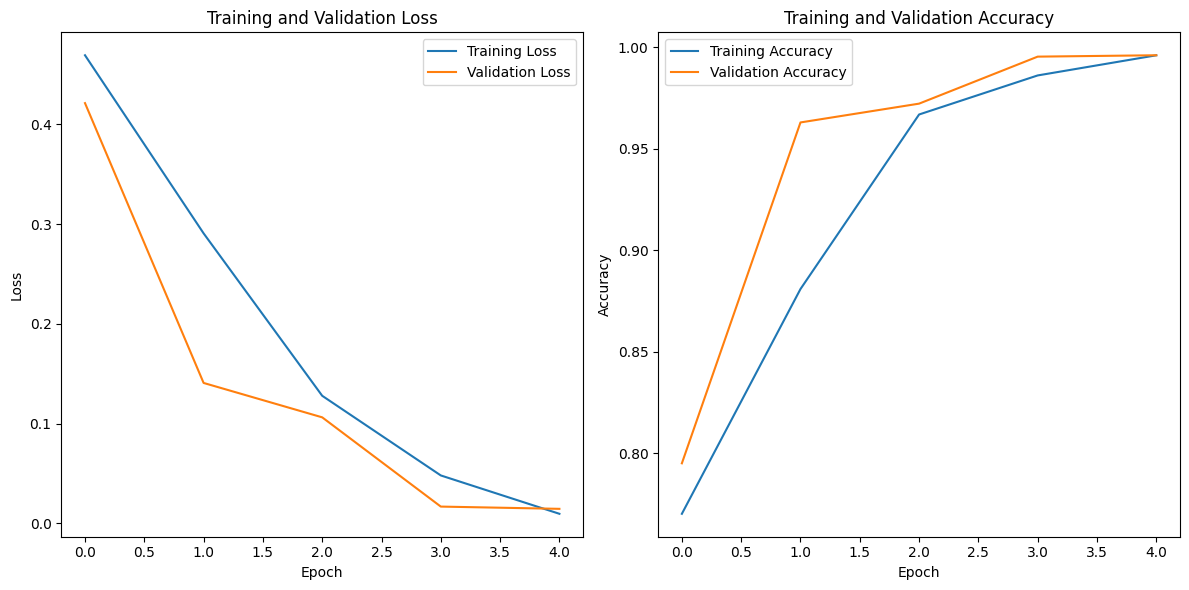

In [141]:
# Plots training and validation loss and accuracy history for better analysis
def plot_history(history):
    # Get training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get training and validation accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Assuming you have trained your model and stored the history in a variable named 'history'
plot_history(history)


#### LSTM TESTING

In [142]:
# Make predicitons of the test data
lstm_predictions=model_lstm.predict(testing_to_padded)

554/554 ━━━━━━━━━━━━━━━━━━━━ 23s 41ms/step


In [143]:
# Round the predictions to the nearest integers (0 or 1)
lstm_predictions=lstm_predictions.round()

In [144]:
lstm_predictions

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

#### LSTM MODEL EVALUATION METRICS

In [145]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score
precision = precision_score(y_test, lstm_predictions)
recall = recall_score(y_test, lstm_predictions)
f1 = f1_score(y_test, lstm_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9924427650589019
Recall: 0.9995522722184912
F1-score: 0.9959848315859915


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#fcab3a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;text-align:center;">BI-LSTM MODEL</p></div>

#### BI-LSTM MODEL CONSTRUCTION

In [235]:
# Regularization parameter
l2_reg = 1e-2

# Construct model using keras layers
model_bilstm=tf.keras.Sequential(
    [
        # Embedding Layer
        tf.keras.layers.Embedding(vocab_size,embedding_dim),
        tf.keras.layers.Dropout(0.5),
        # Supperposed LSTM Layers to form a Bidirectional LSTM Layer
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,recurrent_dropout=0.5, kernel_regularizer=l2(l2_reg))),
        tf.keras.layers.Dropout(0.5),
        # Dense Layer with ReLU
        tf.keras.layers.Dense(embedding_dim, activation='relu', kernel_regularizer=l2(l2_reg)),
        tf.keras.layers.Dropout(0.5),
        # Dense Layer with Sigmoid Activation Function (Because this is a Binary classification, real or fake)
        tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg))
    ]
)

In [236]:
# Bi-LSTM Model Summary
model_bilstm.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_14                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Save the model
model_bilstm.save('model_bilstm_new.h5')

In [300]:
# Save model architecture to JSON
model_json = model_bilstm.to_json()
with open("model_bilstm.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5
model_bilstm.save_weights("model_bilstm_weights.weights.h5")

In [237]:
# Learning rate schedule
def lr_schedule(epoch, lr):
    if epoch > 5:
        return lr * 0.5
    return lr

# Initial learning rate
learning_rate = 0.001

# set optimizer and pass the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
# Fixing Training Parameters
model_bilstm.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'] )

# # Early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# # Learning rate scheduler callback
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

#### BI-LSTM MODEL TRAINING

In [238]:
# Model Trainning and Validation 
history=model_bilstm.fit(training_to_padded, np.array(y_train), epochs=num_epochs,batch_size=256, validation_data=(validation_to_padded,np.array(y_valid)), verbose=2)

Epoch 1/5
208/208 - 50s - 239ms/step - accuracy: 0.9056 - loss: 1.1869 - val_accuracy: 0.9732 - val_loss: 0.1688
Epoch 2/5
208/208 - 45s - 216ms/step - accuracy: 0.9774 - loss: 0.1644 - val_accuracy: 0.9848 - val_loss: 0.1199
Epoch 3/5
208/208 - 45s - 215ms/step - accuracy: 0.9856 - loss: 0.1352 - val_accuracy: 0.9873 - val_loss: 0.1146
Epoch 4/5
208/208 - 45s - 216ms/step - accuracy: 0.9881 - loss: 0.1147 - val_accuracy: 0.9875 - val_loss: 0.1140
Epoch 5/5
208/208 - 45s - 216ms/step - accuracy: 0.9887 - loss: 0.1055 - val_accuracy: 0.9892 - val_loss: 0.1109


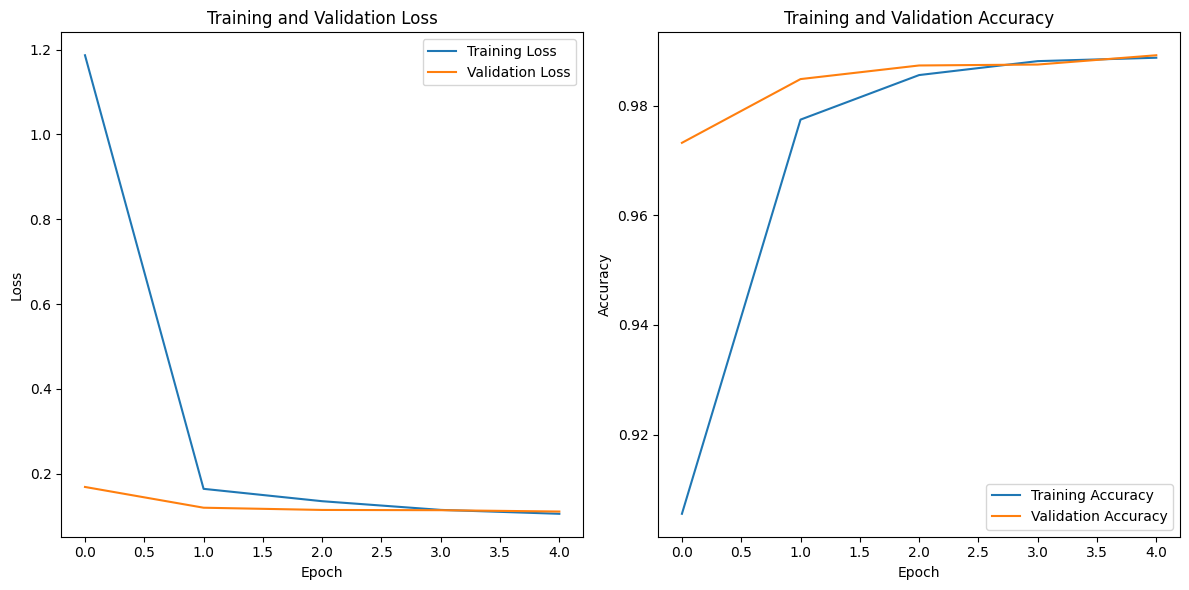

In [239]:
# Plots training and validation loss and accuracy history for better analysis
def plot_history(history):
    # Get training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get training and validation accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Assuming you have trained your model and stored the history in a variable named 'history'
plot_history(history)


#### BI-LSTM MODEL TESTING

In [240]:
bilstm_predictions=model_bilstm.predict(testing_to_padded)

554/554 ━━━━━━━━━━━━━━━━━━━━ 24s 43ms/step


In [241]:
bilstm_predictions=bilstm_predictions.round()

In [242]:
bilstm_predictions

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

#### BI-LSTM MODEL EVALUATION METRICS

In [244]:
# Calculate precision, recall, and f1-score
precision = precision_score(y_test, bilstm_predictions)
recall = recall_score(y_test, bilstm_predictions)
f1 = f1_score(y_test, bilstm_predictions)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9881125939217226
Recall: 0.986232370718603
F1-score: 0.9871715870259368


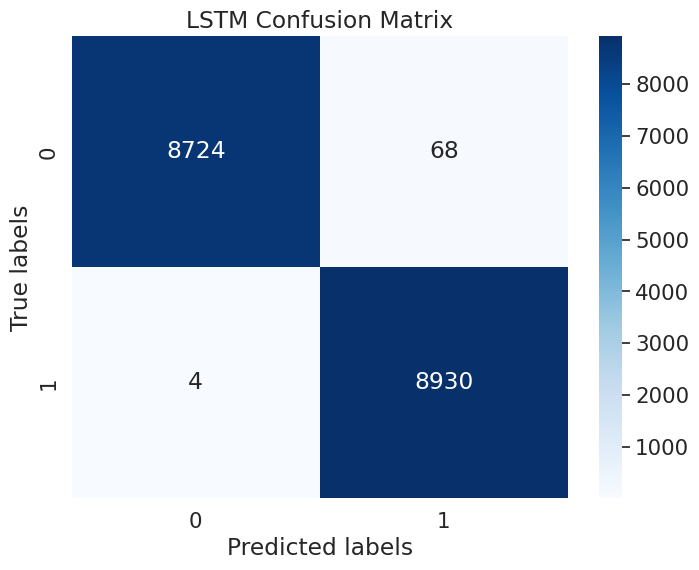

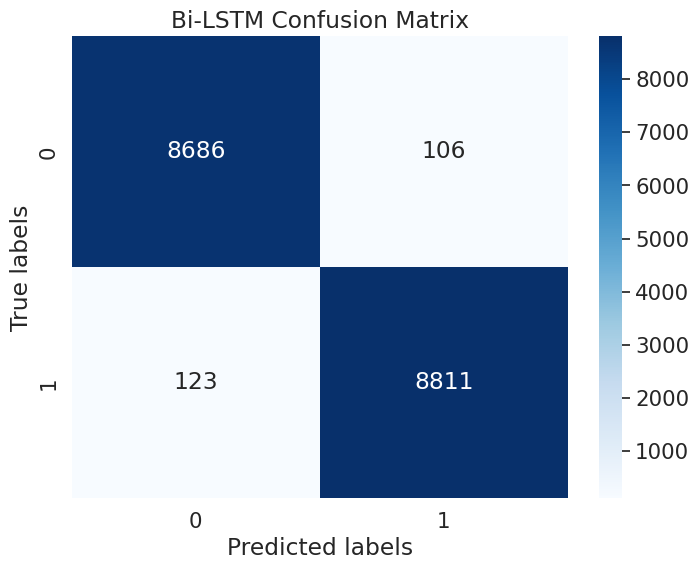

In [260]:
# lstm confusion matrix
cm_lstm= confusion_matrix(y_test,lstm_predictions)
# bi-lstm confusion matrix
cm_bilstm= confusion_matrix(y_test,bilstm_predictions)

# Define labels for the matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']


for i in [cm_lstm,cm_bilstm]:
    # Plot confusion matrix
    sns.set(font_scale=1.4) # for label size
    plt.figure(figsize=(8, 6))
    sns.heatmap(i, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    if i is cm_lstm:
        plt.title('LSTM Confusion Matrix')
        plt.show()
    else:
        plt.title('Bi-LSTM Confusion Matrix')
        plt.show()


In [266]:
# Accuracy and Classification Report
for i in [lstm_predictions,bilstm_predictions]:
    if i is lstm_predictions:
        print("LSTM MODEL ACCURACY SCORE:\n")
        print(accuracy_score(y_test,i))
        print("\nLSTM CLASSIFICATION REPORT:\n")
        print(classification_report(y_test,i))
    else:
        print("Bi-LSTM MODEL ACCURACY SCORE:\n")
        print(accuracy_score(y_test,i))
        print("\nBi-LSTM CLASSIFICATION REPORT:\n")
        print(classification_report(y_test,i))
    

LSTM MODEL ACCURACY SCORE:

0.9959381699198917

LSTM CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8792
           1       0.99      1.00      1.00      8934

    accuracy                           1.00     17726
   macro avg       1.00      1.00      1.00     17726
weighted avg       1.00      1.00      1.00     17726

Bi-LSTM MODEL ACCURACY SCORE:

0.9870811237729888

Bi-LSTM CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8792
           1       0.99      0.99      0.99      8934

    accuracy                           0.99     17726
   macro avg       0.99      0.99      0.99     17726
weighted avg       0.99      0.99      0.99     17726



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#fcab3a;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;color:white;text-align:center;">BERT MODEL</p></div>

#### TOKENIZATION

In [151]:
# Tokenizing function for Bert model
def tokenize_texts(tokenizer, texts, max_length=128):
    return tokenizer(
        text,
        max_length=max_length,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

In [ ]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('aubmindlab/bert-base-arabertv2')
transformer_model = TFBertModel.from_pretrained('aubmindlab/bert-base-arabertv2')

In [133]:
# Tokenize train data X_train
tokenized_X_train = [tokenize_text(tokenizer, article) for article in X_train['Article_content']]

# Tokenize validation data X_valid
tokenized_X_valid = [tokenize_text(tokenizer, article) for article in X_valid['Article_content']]

# Tokenize test data X_test
tokenized_X_test = [tokenize_text(tokenizer, article) for article in X_test['Article_content']]

In [134]:
len(tokenized_X_train),len(tokenized_X_valid),len(tokenized_X_test)

(53175, 17725, 17726)

In [136]:
# TRAINING DATA
# Getting the input id tensors from the tokenized list of input ids, token ids and attention mask
inputs_train=[i['input_ids'] for i in tokenized_X_train]

# Converting the input id tensors to numpy arrays
inputs_train_array = np.array([tensor.numpy() for tensor in inputs_train])

# Ensuring the shapes of inputs_array are compatible
inputs_train_array = inputs_train_array.squeeze(axis=1)

# Getting the attention_mask tensors from the tokenized list of input ids, token ids and attention mask
inputs_train_att=[i['attention_mask'] for i in tokenized_X_train]

# Converting the attention_mask tensors to numpy arrays
inputs_train_att_array = np.array([tensor.numpy() for tensor in inputs_train_att])

# Ensuring the shapes of inputs_array are compatible
inputs_train_att_array = inputs_train_att_array.squeeze(axis=1)

# VALIDATION DATA
# Getting the input id tensors from the tokenized list of input ids, token ids and attention mask
inputs_valid=[i['input_ids'] for i in tokenized_X_valid]

# Converting the input id tensors to numpy arrays
inputs_valid_array = np.array([tensor.numpy() for tensor in inputs_valid])

# Ensuring the shapes of inputs_array are compatible
inputs_valid_array = inputs_valid_array.squeeze(axis=1)

# Getting the attention_mask tensors from the tokenized list of input ids, token ids and attention mask
inputs_valid_att=[i['attention_mask'] for i in tokenized_X_valid]

# Converting the attention_mask tensors to numpy arrays
inputs_valid_att_array = np.array([tensor.numpy() for tensor in inputs_valid_att])

# Ensuring the shapes of inputs_array are compatible
inputs_valid_att_array = inputs_valid_att_array.squeeze(axis=1)


In [144]:
# TESTING DATA
# Getting the input id tensors from the tokenized list of input ids, token ids and attention mask
inputs_test=[i['input_ids'] for i in tokenized_X_test]

# Converting the input id tensors to numpy arrays
inputs_test_array = np.array([tensor.numpy() for tensor in inputs_test])

# Ensuring the shapes of inputs_array are compatible
inputs_test_array = inputs_test_array.squeeze(axis=1)

# Getting the attention_mask tensors from the tokenized list of input ids, token ids and attention mask
inputs_test_att=[i['attention_mask'] for i in tokenized_X_test]

# Converting the attention_mask tensors to numpy arrays
inputs_test_att_array = np.array([tensor.numpy() for tensor in inputs_test_att])

# Ensuring the shapes of inputs_array are compatible
inputs_test_att_array = inputs_test_att_array.squeeze(axis=1)

#### ARABERT MODEL CONSTRUCTION

In [ ]:
# Model class
class CustomModel(tf.keras.Model):
    def __init__(self, transformer_model):
        super(CustomModel, self).__init__()
        self.transformer_model = transformer_model
        self.dense_layer = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        input_ids, input_mask = inputs
        embedding = self.transformer_model(input_ids, attention_mask=input_mask)[0][:, 0, :]
        output = self.dense_layer(embedding)
        return output

In [138]:
# Call build_model function which returns the model into model variable
model=CustomModel(transformer_model)

In [139]:
# Initial learning rate
learning_rate = 0.001
# set optimizer and pass the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [140]:
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [141]:
y_train_np=np.array(y_train)
y_valid_np=np.array(y_valid)
y_test_np=np.array(y_test)

y_train_np.size,y_valid_np.size,y_test_np.size

(53175, 17725, 17726)

In [142]:
# Train model
history=model.fit([inputs_train_array, inputs_train_att_array],
          y_train_np, epochs=5, batch_size=256, validation_data=([inputs_valid_array, inputs_valid_att_array], y_valid_np), verbose=2)

Epoch 1/5


W0000 00:00:1720124771.021108     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720125120.026071     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1720125126.998949     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


208/208 - 493s - 2s/step - accuracy: 0.8593 - loss: 0.3338 - val_accuracy: 0.8983 - val_loss: 0.2437
Epoch 2/5
208/208 - 460s - 2s/step - accuracy: 0.9210 - loss: 0.2043 - val_accuracy: 0.9316 - val_loss: 0.1865
Epoch 3/5
208/208 - 460s - 2s/step - accuracy: 0.9407 - loss: 0.1657 - val_accuracy: 0.9450 - val_loss: 0.1581
Epoch 4/5
208/208 - 460s - 2s/step - accuracy: 0.9542 - loss: 0.1438 - val_accuracy: 0.9557 - val_loss: 0.1405
Epoch 5/5
208/208 - 459s - 2s/step - accuracy: 0.9606 - loss: 0.1292 - val_accuracy: 0.9621 - val_loss: 0.1284


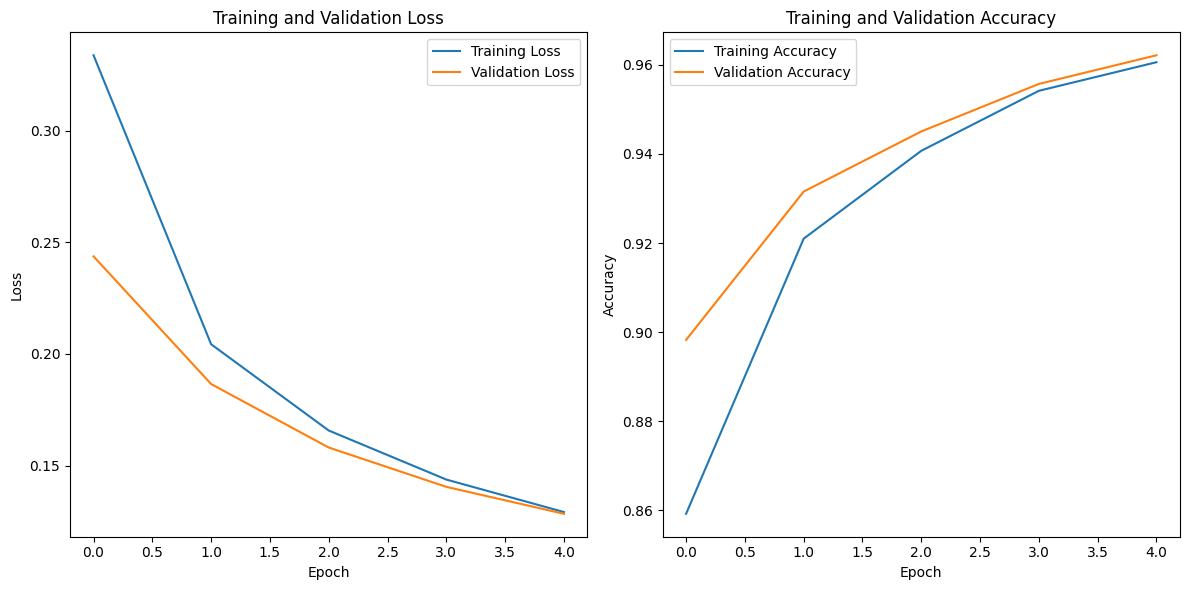

In [143]:
# Plots training and validation loss and accuracy history for better analysis
def plot_history(history):
    # Get training and validation loss
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Get training and validation accuracy
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Plot training and validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Assuming you have trained your model and stored the history in a variable named 'history'
plot_history(history)


#### ARABERT MODEL TESTING

In [157]:
# Making Predicitons on the test data
arabert_predicitons=model.predict([inputs_test_array, inputs_test_att_array])

554/554 ━━━━━━━━━━━━━━━━━━━━ 121s 212ms/step


In [162]:
# Round off predcitons to single intergers (0 or 1)
arabert_predicitons=arabert_predicitons.round()

#### ARABERT MODEL EVALUATION METRICS

In [163]:
# Calculate precision, recall, and f1-score
precision = precision_score(y_test, arabert_predicitons)
recall = recall_score(y_test, arabert_predicitons)
f1 = f1_score(y_test, arabert_predicitons)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.9607405755074727
Recall: 0.9641817774792926
F1-score: 0.9624581005586593


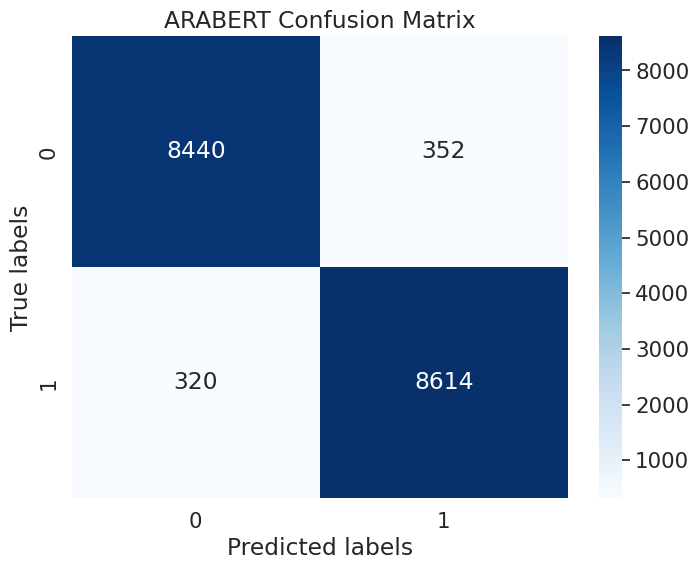

In [164]:
# bert confusion matrix
cm_bert= confusion_matrix(y_test,arabert_predicitons)

# Define labels for the matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
categories = ['0', '1']


# Plot confusion matrix
sns.set(font_scale=1.4) # for label size
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bert, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('ARABERT Confusion Matrix')
plt.show()


In [166]:
# Accuracy and Classification Report
print("AraBert MODEL ACCURACY SCORE:\n")
print(accuracy_score(y_test,arabert_predicitons))
print("\nAraBert CLASSIFICATION REPORT:\n")
print(classification_report(y_test,arabert_predicitons))

AraBert MODEL ACCURACY SCORE:

0.9620895859189891

AraBert CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8792
           1       0.96      0.96      0.96      8934

    accuracy                           0.96     17726
   macro avg       0.96      0.96      0.96     17726
weighted avg       0.96      0.96      0.96     17726

